##Import the necessary libraries

In [35]:
!pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 9.9 MB/s 


In [36]:
!pip install playsound==1.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model

#VIDEO ANALYSIS AND TESTING

In this milestone, we perform video analysis to get the prediction for the input frames.

In [39]:
def video_test(vid_path):
    cap = cv2.VideoCapture(vid_path)
    if (cap.isOpened()== False): 
      print("Error opening video stream or file")
    while(cap.isOpened()):
      ret, frame = cap.read()
      if ret == True:
        x=image.img_to_array(frame)
        res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
        x=np.expand_dims(res,axis=0)
        model=load_model("/content/forest.h5")
        cv2_imshow(frame)
        pred=model.predict(x)
        pred = int(pred[0][0])
        pred
        int(pred)
        if pred==0:
          print('ALERT!!!! FOREST FIRE DETECTED')
          break
        else:
          print("NO FOREST FIRE")
          break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

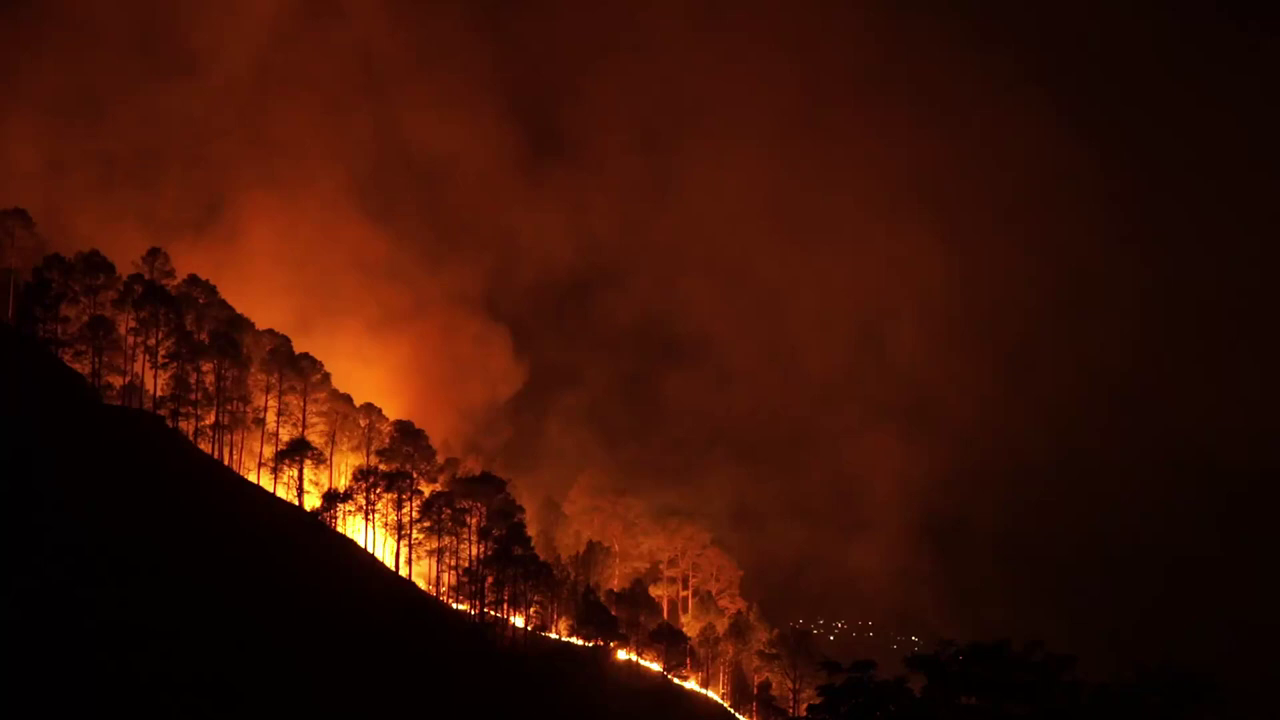

1/1 [==============================] - 0s 143ms/step
ALERT!!!! FOREST FIRE DETECTED


In [42]:
video_test('/content/drive/MyDrive/Datasets/Dataset/videoplayback.mp4')

#SMS ALERT

If a forest fire is detected then will send an SMS Alert to the registered mobile number.

In [52]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid = "ACb8327485cef89b8ed3adbe5cb710752f"
  auth_token = "d91caa0af197919cf188fb7ea0db9fb5"

  client = Client(account_sid, auth_token)
  message = client.messages.create(

  body="Forest Fire detected , Stay safe!!!",
  from_=("+18087364790"),
  to=("+917358598519")
  )
  print("ALERT!!!!FIRE DETECTED")
  print("SMS Sent")
elif pred==1:
  print('No DANGER....NO FIRE DETECTED')

Forest fire
ALERT!!!!FIRE DETECTED
SMS Sent
